In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data = data.set_index("customerID")


In [4]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

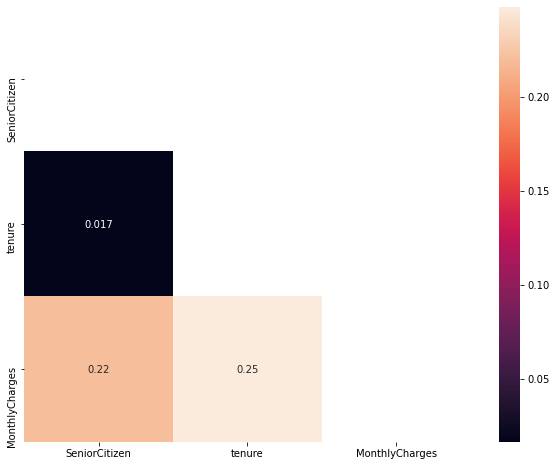

In [7]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [8]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
contract_dict = {'Month-to-month':1, 'One year':2, 'Two year':3}
data['Contract'] = data['Contract'].map(contract_dict)

In [10]:
data['Contract']

customerID
7590-VHVEG    1
5575-GNVDE    2
3668-QPYBK    1
7795-CFOCW    2
9237-HQITU    1
             ..
6840-RESVB    2
2234-XADUH    2
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    3
Name: Contract, Length: 7043, dtype: int64

In [11]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
def change_partner(x):
    if x in ['Yes']:
        return '1'
    else:
        return '0'

data['Partner'] = list(map(change_partner, data['Partner'] ))

In [13]:
data['Partner'].head()

customerID
7590-VHVEG    1
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
Name: Partner, dtype: object

In [14]:
 data['Partner'] = data['Partner'].astype('int64')

In [15]:
data['Partner'].head()

customerID
7590-VHVEG    1
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
Name: Partner, dtype: int64

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,1,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,2,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,1,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,2,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,1,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data['TechSupport'].value_counts()


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [18]:
inputData = data[['tenure', 'SeniorCitizen','MonthlyCharges','Partner','Contract']]

In [19]:
target=data[["Churn"]]


In [20]:
inputData.head()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
customerID,,,,,
7590-VHVEG,1,0,29.85,1,1
5575-GNVDE,34,0,56.95,0,2
3668-QPYBK,2,0,53.85,0,1
7795-CFOCW,45,0,42.30,0,2
9237-HQITU,2,0,70.70,0,1


In [21]:
inputData.shape


(7043, 5)

In [22]:
target.shape


(7043, 1)

In [23]:
data['Partner']=list(map(change_partner, data['Partner']))


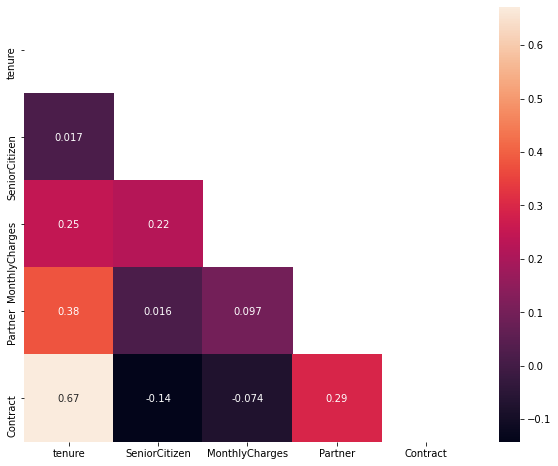

In [24]:

correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [25]:
inputData.describe()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692,0.483033,1.690473
std,24.559481,0.368612,30.090047,0.499748,0.833755
min,0.000000,0.000000,18.250000,0.000000,1.000000
25%,9.000000,0.000000,35.500000,0.000000,1.000000
50%,29.000000,0.000000,70.350000,0.000000,1.000000
75%,55.000000,0.000000,89.850000,1.000000,2.000000
max,72.000000,1.000000,118.750000,1.000000,3.000000


## Standard scaler

In [26]:
transformer = StandardScaler().fit(inputData)
scaled_x = transformer.transform(inputData)


In [27]:
pd.DataFrame(scaled_x).head()


,0,1,2,3,4
0,-1.277445,-0.439916,-1.160323,1.034530,-0.828207
1,0.066327,-0.439916,-0.259629,-0.966622,0.371271
2,-1.236724,-0.439916,-0.362660,-0.966622,-0.828207
3,0.514251,-0.439916,-0.746535,-0.966622,0.371271
4,-1.236724,-0.439916,0.197365,-0.966622,-0.828207


## First try without balancing anything


In [28]:
Y= target


In [29]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, target)
                        
print("The accuracy of the model is: ",round(classification.score(scaled_x, target),2))

The accuracy of the model is:  0.79


In [30]:
print("The kappa of the model is: ",round(cohen_kappa_score(target,classification.predict(scaled_x)),2))


The kappa of the model is:  0.43


## Downsampeling

In [31]:
rus = RandomUnderSampler()


X_rus, y_rus = rus.fit_sample(scaled_x, Y)

In [32]:
pd.DataFrame(y_rus).value_counts()


Churn
Yes      1869
No       1869
dtype: int64

In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)
                        
print("The accuracy of the model is: ",round(classification.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification.predict(X_rus)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


## Oversampling


In [34]:
ros = RandomOverSampler()


In [35]:
X_ros, y_ros = ros.fit_sample(scaled_x, Y)


In [36]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)
                        
print("The accuracy of the model is: ",round(classification.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,classification.predict(X_ros)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.51


In [37]:
y_ros.value_counts()


Churn
Yes      5174
No       5174
dtype: int64

## SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_sample(scaled_x, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [39]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.5


## Tomek

In [40]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_sample(scaled_x, Y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4678
Yes      1869
dtype: int64

In [41]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)
                        
print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.47


## Trying with SMOTE after Tomek


In [42]:
X_sm1, y_sm1 = smote.fit_sample(X_tl,y_tl)
pd.DataFrame(y_sm1).value_counts()

Churn
Yes      4678
No       4678
dtype: int64

In [43]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm1, y_sm1)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm1, y_sm1),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm1,classification.predict(X_sm1)),2))

The accuracy of the model is:  0.77
The kappa of the model is:  0.55


In [44]:
data['Churn'].head()

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
Name: Churn, dtype: object

In [45]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
#churn_dict = {'No':0, 'Yes':1}
#data['Churn'] = data['Churn'].map(churn_dict)

In [47]:
#data['Churn'].unique()

array([0, 1], dtype=int64)

In [48]:
df=pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)],axis=1)
df.columns =['tenure', 'SeniorCitizen','MonthlyCharges','Partner','Contract','Churn']

In [58]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
churn_dict = {'No':0, 'Yes':1}
df['Churn'] = df['Churn'].map(churn_dict)

In [61]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [60]:
df.head()


,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract,Churn
0,-1.277445,-0.439916,-1.160323,1.034530,-0.828207,0
1,0.066327,-0.439916,-0.259629,-0.966622,0.371271,0
2,-1.236724,-0.439916,-0.362660,-0.966622,-0.828207,1
3,0.514251,-0.439916,-0.746535,-0.966622,0.371271,0
4,-1.236724,-0.439916,0.197365,-0.966622,-0.828207,1


In [62]:
predictions = classification.predict(X_sm1)
classification.score(X_sm1, y_sm1)

0.7745831551945276

In [63]:
y_sm1.value_counts()


Churn
Yes      4678
No       4678
dtype: int64

In [64]:
confusion_matrix(y_sm1, predictions)

array([[3449, 1229],
       [ 880, 3798]], dtype=int64)

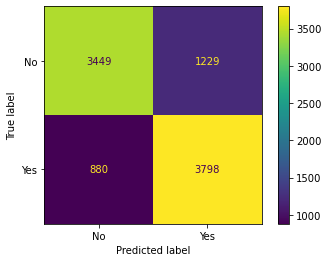

In [65]:
plot_confusion_matrix(classification, X_sm1, y_sm1)


In [66]:
plt.scatter(df['X_sm1'], df['y_sm1'], c = df['Churn'])
plt.xlabel('X_sm1')
plt.ylabel('y_sm1')
plt.show()


KeyError: 'X_sm1'